In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [3]:
path = '/content/drive/MyDrive/Traffic Sign Dataset/'
with open(path + "train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open(path + "valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open(path + "test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [7]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [4]:
X_train , y_train = train['features'] , train['labels']
X_test , y_test = test['features'] , test['labels']
X_validation , y_validation = valid['features'] , valid['labels']

In [22]:
X_train_gray = X_train[:,:,:,0] / 255
X_test_gray = X_test[:,:,:,0] / 255
X_validation_gray = X_validation[:,:,:,0] / 255

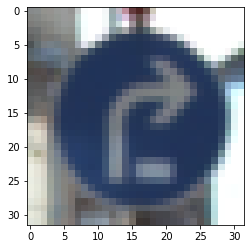

In [15]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
#y_train[i]

In [5]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_validation_cat = to_categorical(y_validation)

In [65]:
y_test_cat.shape[1]

43

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [39]:
input_ = tf.keras.layers.Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))
x = input_
for i in range(1,4):
  x = tf.keras.layers.Conv2D(2**(2+i),kernel_size=(3,3),activation = 'relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dropout(0.4)(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(y_test_cat.shape[1],activation='softmax')(x)
model=tf.keras.models.Model(inputs = input_ , outputs = output)
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
model.summary()

In [42]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>=0.94):
      print("\nReached 90.0% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

In [43]:
history = model.fit(X_train,y_train_cat,512,500,validation_data=[X_validation,y_validation_cat],callbacks=[callbacks])

Epoch 1/500
68/68 [==============================] - 1s 19ms/step - loss: 0.1308 - accuracy: 0.9598 - val_loss: 0.2939 - val_accuracy: 0.9313
Epoch 2/500
68/68 [==============================] - 1s 19ms/step - loss: 0.1400 - accuracy: 0.9574 - val_loss: 0.3019 - val_accuracy: 0.9327
Epoch 3/500
68/68 [==============================] - 1s 19ms/step - loss: 0.1290 - accuracy: 0.9610 - val_loss: 0.3012 - val_accuracy: 0.9338
Epoch 4/500
68/68 [==============================] - 1s 19ms/step - loss: 0.1342 - accuracy: 0.9596 - val_loss: 0.2728 - val_accuracy: 0.9311
Epoch 5/500
68/68 [==============================] - 1s 19ms/step - loss: 0.1310 - accuracy: 0.9599 - val_loss: 0.3028 - val_accuracy: 0.9243
Epoch 6/500
68/68 [==============================] - 1s 19ms/step - loss: 0.1397 - accuracy: 0.9583 - val_loss: 0.2912 - val_accuracy: 0.9297
Epoch 7/500
68/68 [==============================] - 1s 19ms/step - loss: 0.1374 - accuracy: 0.9589 - val_loss: 0.3142 - val_accuracy: 0.9227
Epoch 

In [44]:
dict_ = {
    0 : "Speed limit (20km/h)", 
    1 : "Speed limit (30km/h)",
    2 : "Speed limit (50km/h)", 
    3 : "Speed limit (60km/h)",
    4 : "Speed limit (70km/h)", 
    5 : "Speed limit (80km/h)",
    6 : "End of speed limit (80km/h)",
    7 : "Speed limit (100km/h)",
    8 : "Speed limit (120km/h)",
    9 : "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing", 
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons",

}

In [48]:
test_image = X_test[0]
test_image = np.reshape(test_image,(1,test_image.shape[0],test_image.shape[1],test_image.shape[2]))
y_pred = model.predict(test_image)

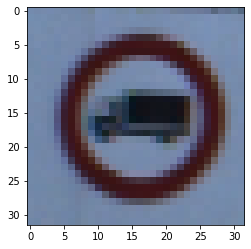

In [50]:
plt.imshow(X_test[0])

In [52]:
dict_[y_test[0]]

'Vehicles over 3.5 metric tons prohibited'

In [49]:
idx = np.argmax(y_pred)
dict_[idx]

'Vehicles over 3.5 metric tons prohibited'